# High School Analysis
- We are going to run an analysis of the data collected from High Schools
- From the analysis we would be able to view the following
- A high-level snapshot of the high school's key metrics, presented in a table format
- A graphical analysis of the data

# Import necessary libraries dependencies

In [1]:
# Dependencies - file to load
# Drop unnamed index column
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
grades = pd.read_csv("Resources/grades.csv", index_col=0)

# Statistical Overview of DataFrame

In [2]:
# Display a statistical overview of the dataframe
grades.describe().round(2)

,Math,Science,English,History,size,budget
count,18.00,18.00,18.00,18.00,18.00,18.00
mean,76.78,80.11,83.89,81.28,2644.33,1475455.94
std,12.18,12.50,11.05,12.43,1299.76,942024.21
min,56.00,56.00,60.00,54.00,427.00,248087.00
25%,66.00,76.00,77.00,76.00,1770.75,948907.50
50%,80.00,85.00,85.50,83.00,2566.00,1068978.00
75%,85.00,88.00,92.00,87.75,3209.25,1904079.00
max,93.00,94.00,96.00,99.00,4976.00,3124928.00


In [3]:
# Display the number of rows and columns, the data type of each column, the number of non-NaN elements, and the total memory usage.
grades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Math          18 non-null     float64
 1   Science       18 non-null     float64
 2   English       18 non-null     float64
 3   History       18 non-null     float64
 4   grade         18 non-null     object 
 5   school_name   18 non-null     object 
 6   student_name  20 non-null     object 
 7   gender        20 non-null     object 
 8   type          18 non-null     object 
 9   size          18 non-null     float64
 10  budget        18 non-null     float64
dtypes: float64(6), object(5)
memory usage: 1.9+ KB


# Cleaning Data

In [4]:
# Determine if there are any missing values
grades.count()

Math            18
Science         18
English         18
History         18
grade           18
school_name     18
student_name    20
gender          20
type            18
size            18
budget          18
dtype: int64

In [5]:
# Drop missing values
grades= grades.dropna(how='any')

In [6]:
# Cleanup and rename columns names to more explanatory names using a ditionary
grades_df = grades.rename(columns={"student_name": 'Student Name',"school_name":'School Name',"grade":'Grade'})
grades_df.head()

,Math,Science,English,History,Grade,School Name,Student Name,gender,type,size,budget
0,,,,,,,,,,,
1,80.0,94.0,83.0,96.0,9th,Huang High School,Paul Bradley,M,District,2917.0,1910635.0
2,89.0,76.0,76.0,66.0,12th,Figueroa High School,Victor Smith,M,District,2949.0,1884411.0
3,93.0,88.0,93.0,76.0,12th,Shelton High School,Kevin Rodriguez,M,Charter,1761.0,1056600.0
4,66.0,78.0,96.0,85.0,12th,Hernandez High School,Dr. Richard Scott,M,District,4635.0,3022020.0
5,84.0,88.0,77.0,78.0,9th,Griffin High School,Bonnie Ray,F,Charter,1468.0,917500.0


# Rows and Columns Data

In [7]:
# Display the 1st, 9th, 13th row information
# Display rows 0 to 3
test1=grades_df.iloc[[0,8,12,]]
test2=grades_df.iloc[0:3]
print(test1)
print(test2)

    Math  Science  English  History Grade          School Name  \
0                                                                
1   80.0     94.0     83.0     96.0   9th    Huang High School   
9   56.0     94.0     76.0     77.0   9th   Holden High School   
13  66.0     88.0     85.0     76.0   9th  Johnson High School   

       Student Name gender      type    size     budget  
0                                                        
1      Paul Bradley      M  District  2917.0  1910635.0  
9      Michael Roth      M   Charter   427.0   248087.0  
13  Brittney Walker      F  District  4761.0  3094650.0  
   Math  Science  English  History Grade           School Name  \
0                                                                
1  80.0     94.0     83.0     96.0   9th     Huang High School   
2  89.0     76.0     76.0     66.0  12th  Figueroa High School   
3  93.0     88.0     93.0     76.0  12th   Shelton High School   

      Student Name gender      type    size     

In [8]:
# Print the data from the the first column
grades_df.iloc[:,0].head()

0
1    80.0
2    89.0
3    93.0
4    66.0
5    84.0
Name: Math, dtype: float64

In [9]:
# Display the data from the 2nd, 4th, and 6th columns showing rows 1,3 and 4
grades_df.loc[[1,3,4],["Science","History","School Name"]]

,Science,History,School Name
0,,,
1,94.0,96.0,Huang High School
3,88.0,76.0,Shelton High School
4,78.0,85.0,Hernandez High School


In [10]:
# Print data from the first three coluns showing last five rows
grades_df.iloc[:, 0:3].tail()

,Math,Science,English
0,,,
14,84.0,92.0,92.0
15,85.0,60.0,60.0
16,74.0,85.0,92.0
17,64.0,56.0,91.0
18,56.0,64.0,86.0


In [11]:
# Display first five rows in the second column
grades_df.iloc[:, 1].head()

0
1    94.0
2    76.0
3    88.0
4    78.0
5    88.0
Name: Science, dtype: float64

In [12]:
# Print row 1 and row 3 with all columns
grades_df.iloc[[1,3], :]

,Math,Science,English,History,Grade,School Name,Student Name,gender,type,size,budget
0,,,,,,,,,,,
2,89.0,76.0,76.0,66.0,12th,Figueroa High School,Victor Smith,M,District,2949.0,1884411.0
4,66.0,78.0,96.0,85.0,12th,Hernandez High School,Dr. Richard Scott,M,District,4635.0,3022020.0


In [13]:
# Display the name 'Dr. Richard Scott' (4th row 7th column)
grades_df.iloc[3,6]

'Dr. Richard Scott'

# Grades Summary
- Highest grades for grade 12
- Lowest grades for grade 9

In [14]:
# Display the highest grades for grade 12
grades_df.loc[(grades_df["Grade"]== "12th")].max()

Math                            93
Science                         88
English                         96
History                         99
Grade                         12th
School Name     Wright High School
Student Name          Victor Smith
gender                           M
type                      District
size                          4976
budget                 3.12493e+06
dtype: object

In [15]:
# Display the lowest grades for grade 9
grades_df.loc[(grades_df["Grade"]== "9th")].min()

Math                            56
Science                         56
English                         76
History                         76
Grade                          9th
School Name     Beaver High School
Student Name            Bonnie Ray
gender                           F
type                       Charter
size                           427
budget                      248087
dtype: object

In [16]:
# Display the highest grade for grade 12
grades_df.loc[(grades_df["Grade"]== "12th")].max()

Math                            93
Science                         88
English                         96
History                         99
Grade                         12th
School Name     Wright High School
Student Name          Victor Smith
gender                           M
type                      District
size                          4976
budget                 3.12493e+06
dtype: object

# Data Exploration
- Which schools had the highest Math scores: Display results in a bar chart
- Which schools had the highest English scores: Display result in a bar chart

In [17]:
# Highest Math score
high_math = grades_df.groupby("School Name")['Math'].max()
high_math.head(20)

School Name
Bailey High School       64.0
Beaver High School       64.0
Bell high School         56.0
Cabrera High School      74.0
Figueroa High School     89.0
Ford High School         84.0
Griffin High School      84.0
Hernandez High School    66.0
Hill high School         74.0
Holden High School       56.0
Huang High School        80.0
Johnson High School      66.0
Pena High School         80.0
Rodriguez High School    93.0
Shelton High School      93.0
Thomas High School       85.0
Wilson High School       85.0
Wright High School       89.0
Name: Math, dtype: float64

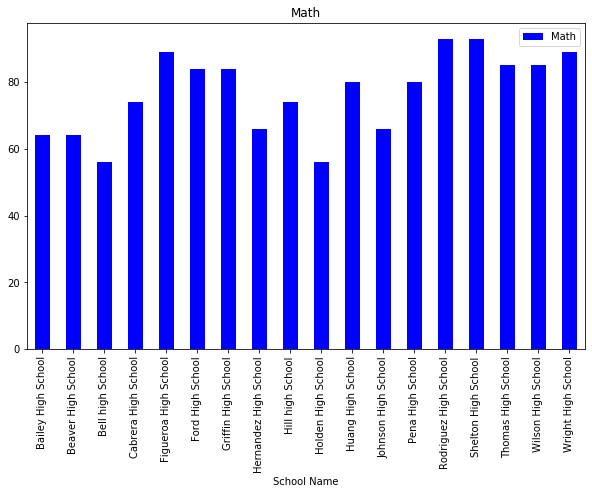

In [18]:
# Graphical analysis
high_math.plot(kind='bar',subplots=True, color='blue',figsize=(10, 6)); plt.legend()

In [19]:
# Highest English score
high_english = grades_df.groupby("School Name")['English'].max()
high_english.head(20)

School Name
Bailey High School       60.0
Beaver High School       91.0
Bell high School         86.0
Cabrera High School      92.0
Figueroa High School     76.0
Ford High School         92.0
Griffin High School      77.0
Hernandez High School    96.0
Hill high School         92.0
Holden High School       76.0
Huang High School        83.0
Johnson High School      85.0
Pena High School         93.0
Rodriguez High School    77.0
Shelton High School      93.0
Thomas High School       60.0
Wilson High School       85.0
Wright High School       96.0
Name: English, dtype: float64

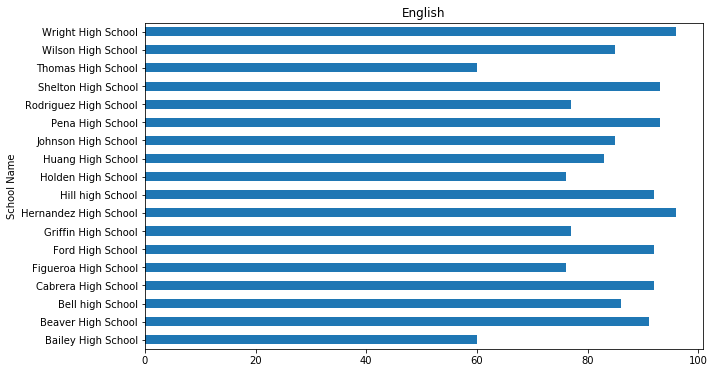

In [20]:
high_english.plot(kind='barh',subplots=True,figsize=(10, 6)); 

# High School Data Summary
- Total number and budget for schools
- Average English and Math scores
- Passing grades for Math and English: Grades >=70
- Create dataframe and display the results

In [21]:
# Calculate the total number of High Schools
# Calculate the total number of students
# Calculate the total budget for all schools
school_count = grades_df["School Name"].count()
student_count = grades_df["Student Name"].count()
total_budget = grades_df["budget"].sum()

In [22]:
# Calculate the average Math score
# Calculate the average English score
avg_math_score = grades_df["Math"].mean()
avg_eng_score = grades_df["English"].mean()

In [23]:
# Calculate the passing rates (>=70) for Math
# Calculate the passing rates (>=70) for English
passing_math = grades_df[(grades_df["Math"]>=70)].count()["Student Name"]
passing_english = grades_df[(grades_df["English"]>=70)].count()["Student Name"]


In [24]:
# Calculate the passing percentage English rate (passing_math/studentcount * 100)
# Calculate the passing percentage English rate (passing_math/studentcount * 100)
math_percentage = passing_math / float(student_count)*100
english_percentage = passing_english / float(student_count)*100

# Create a DataFrame and display the results

In [25]:
# Create DataFrame
high_school_summary = pd.DataFrame([{
    "Total Schools": school_count,
    "Total Students": student_count,
    "Total Budget": total_budget,
    "Average Math Score": avg_math_score,
    "Average English Score": avg_eng_score,
    "% Passing Math": math_percentage,
    "% Passing English": english_percentage
}])

In [26]:
# Format Columns
high_school_summary["Total Schools"] = high_school_summary["Total Schools"]
high_school_summary["Total Students"] = high_school_summary["Total Students"]
high_school_summary["Total Budget"] = high_school_summary["Total Budget"].map("${:,.2f}".format)
high_school_summary["Average Math Score"] = high_school_summary["Average Math Score"].map("{:.1f}".format)
high_school_summary["Average English Score"] = high_school_summary["Average English Score"].map("{:.1f}".format)
high_school_summary["% Passing Math"] = high_school_summary["% Passing Math"].map("{:.1f}".format)
high_school_summary["% Passing English"] = high_school_summary["% Passing English"].map("{:.1f}".format)

In [27]:
# Display Results
high_school_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average English Score,% Passing Math,% Passing English
0,18,18,"$26,558,207.00",76.8,83.9,66.7,88.9
